In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length' , 'sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


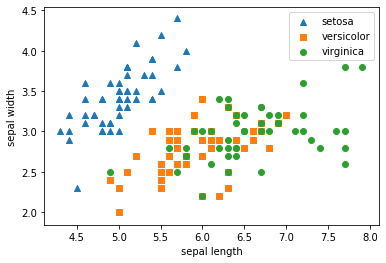

In [2]:
markers = ['^' , 's' , 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
  y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_scaled = StandardScaler().fit_transform(irisDF)
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


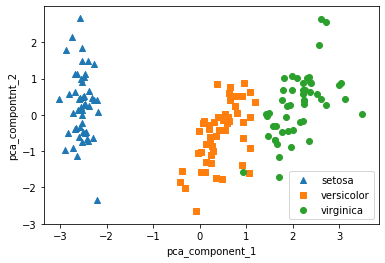

In [7]:
markers = ['^' , 's' , 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_compontnt_2')
plt.show()

In [8]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy', cv=3)
print(scores)

[0.98 0.94 0.96]


In [10]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores_pca)


[0.98 0.98 1.  ]
